In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

c:\users\doubles\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Data Load
Data_Path = 'F:\\DoubleS2\\SHU_202\\과제 관련\\\\5 거짓말과제\\과제된후\\\\034_FeatureExtraction\\\\0_Python\\\\0_MFCC\\\\v1\\Dataset_Extract_MFCC_Data_f25_o10_mf40_v1.npy'
Label_Path = 'F:\\DoubleS2\\SHU_202\\과제 관련\\\\5 거짓말과제\\과제된후\\\\034_FeatureExtraction\\\\0_Python\\\\0_MFCC\\\\v1\\Dataset_Extract_MFCC_Label_f25_o10_mf40_v1.npy'
Data = np.load(Data_Path).T
Label = np.load(Label_Path)

In [3]:
Data = Data[1:,:,:]
Label = Label[1:,:]

In [4]:
Data[1,:,:]

array([[ 11.73507653,  13.75468489,  29.39841099, -10.23395238,
          2.00006629,  10.98974622,   1.5703092 ,  19.12459621,
          5.17364955,   5.84219054, -35.16462167,   9.25679971],
       [ 12.60454883,  42.29761624, -15.15178123,   6.33494459,
         17.68322745,  -0.42196062,  22.30975849,   3.95778741,
          5.26060468, -20.5539046 ,  -6.55690662,  16.72326866],
       [ 40.52232093, -20.6065838 ,   2.77282858,   0.41948842,
        -18.39290077,  -2.48092198,   4.0658274 ,  -4.59006114,
          9.04866756,   4.8576131 ,   8.08173369,  21.22616753],
       [ -6.7828615 ,   6.43579945,   6.33532945,  -9.21711694,
          1.65490308,  16.55219583,  -3.70582885,  -1.71472201,
         24.017706  ,  -6.59973426,   8.86142506,  -9.09220298],
       [ -5.64355966,   4.12936747,  -1.62239113,   4.29583254,
         10.77433427,   6.16846586,  -6.74875534,   5.28680435,
         -8.63626686,   4.64539547,   3.8297334 ,   6.22674745],
       [ 11.47257754,   3.43276615,

In [5]:
Label

array([[  4.,   1.,   1.,   1.,   2.,   2.],
       [  4.,   1.,   1.,   1.,   2.,   2.],
       [  4.,   1.,   1.,   1.,   2.,   2.],
       ...,
       [127.,   9.,  19.,  40.,   1.,   6.],
       [127.,   9.,  19.,  40.,   1.,   6.],
       [127.,   9.,  19.,  40.,   1.,   6.]])

In [6]:
# data
range_index = np.array(range(Data.shape[0]))
X_Train_Index, X_Test_Index, Y_Train, Y_Test = train_test_split(range_index, Label[:,4], test_size = 0.2, stratify = Label[:,4])

In [7]:
X_Train = Data[X_Train_Index,:,:]
X_Test = Data[X_Test_Index,:,:]
Y_Train = Label[X_Train_Index,:]
Y_Test = Label[X_Test_Index,:]

In [8]:
Y_Train = Y_Train[:, 4:6]
Y_Train[:,1] = np.where(Y_Train[:,0] == 1, 2, 1)
Y_Test = Y_Test[:, 4:6]
Y_Test[:,1] = np.where(Y_Test[:,0] == 1, 2, 1)

Test_Index_Male = np.where(Y_Test[:,0] == 1)
Test_Index_Female = np.where(Y_Test[:,0] == 2)

X_Test_Male = X_Test[Test_Index_Male, :, :]
X_Test_Female = Y_Test[Test_Index_Female, :]
Y_Test_Male = X_Test[Test_Index_Male, :]
Y_Test_Female = Y_Test[Test_Index_Female, :]

Test_Index_Female_tmp = np.where(Y_Test[:,0] == 2).index

CNN-LSTM Model Part

In [9]:
# Training Parameters
learning_rate = [0.0001, 0.00001]
#learning_rate = 0.0001
epochs = [20]
batch_size = [128, 256]
 
# Dropout, probability to drop a unit
dropout = 0.5 

# convolution parameters
n_filter1 = 32
filter_1 = [3, 3]
pool_1 = [2, 2]
stride_1 = 1

n_filter2 = 64
filter_2 = [3, 3]
pool_2 = [2, 2]
stride_2 = 1
###### model parameters ###########################################################
time_steps = 12
window_size = 12
lstm_nodes= 12

In [10]:
X = tf.placeholder(tf.float32, [None, time_steps, window_size], name = 'X')
Y = tf.placeholder(tf.float32, [None, 2], name = 'Y')
lr = tf.placeholder(tf.float32, [], name = 'lr')
        
# create the convolutional layers for each CNN per time step
#m = []
#for i in range(0,time_steps):
# batch, time_step, window_size
_X = tf.reshape(X, shape=[-1, 12, 12, 1])
conv1 = tf.layers.conv2d(inputs = _X, filters = n_filter1, kernel_size = filter_1, padding = "SAME", activation=tf.nn.relu)
    # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
conv1 = tf.layers.max_pooling2d(inputs = conv1, pool_size = pool_1, strides = stride_1, padding = "SAME")
print(conv1.shape)
        
# Convolution Layer with 64 filters and a kernel size of 3
conv2 = tf.layers.conv2d(inputs = conv1, filters = n_filter2, kernel_size = filter_2, padding = "SAME", activation=tf.nn.relu)
# Max Pooling (down-sampling) with strides of 2 and kernel size of 2
conv2 = tf.layers.max_pooling2d(inputs = conv2, pool_size = pool_2, strides = stride_2, padding = "SAME")
print(conv2.shape)

fc1 = tf.contrib.layers.flatten(conv2)
fc1 = tf.reshape(fc1, [-1, 1, fc1.shape[1]])

with tf.variable_scope('lstm1'):
    basic_cell_1 = tf.nn.rnn_cell.BasicLSTMCell(num_units=lstm_nodes)
    outputs_1, states_1 = tf.nn.dynamic_rnn(cell=basic_cell_1, inputs=fc1, dtype=tf.float32)
with tf.variable_scope('lstm2'):
    basic_cell = tf.nn.rnn_cell.BasicLSTMCell(num_units=lstm_nodes)
    outputs, states = tf.nn.dynamic_rnn(cell=basic_cell, inputs=outputs_1, dtype=tf.float32)


#basic_cell_1 = tf.nn.rnn_cell.BasicLSTMCell(num_units=lstm_nodes)
#outputs_1, states_1 = tf.nn.dynamic_rnn(cell=basic_cell_1, inputs=fc1, dtype=tf.float32)
#print(outputs_1.shape)


#basic_cell = tf.nn.rnn_cell.BasicLSTMCell(num_units=lstm_nodes)
#outputs, states = tf.nn.dynamic_rnn(cell=basic_cell, inputs=outputs_1, dtype=tf.float32)
#print(outputs.shape)
outputs = tf.layers.dense(outputs,2)
outputs = tf.reshape(outputs, [-1, 2])
outputs = tf.nn.softmax(outputs)
print(outputs.shape)

#loss = tf.losses.mean_squared_error(Y, outputs)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = outputs, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
training_op = optimizer.minimize(loss) 
init = tf.global_variables_initializer()

corr = tf.equal(tf.argmax(outputs, 1), tf.argmax(Y, 1))
accr = tf.reduce_mean(tf.cast(corr, "float"))
cnfm = tf.confusion_matrix(tf.argmax(Y,1), tf.argmax(outputs,1))
#target_names = ['Male', 'Female']
#cnfm = classification_report(Y, outputs, target_names = target_names)

(?, 12, 12, 32)
(?, 12, 12, 64)
(?, 2)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [11]:
# Initializing the variables
init = tf.global_variables_initializer()
n_train = X_Train.shape[0]

Epoch: 000/020 cost: 2.045300643
Train - LR : 0.000100 / Epoch : 20 / Batch : 128 / Acc : 0.883
[[54 12]
 [ 3 59]]
[[16971  4173]
 [ 1738 18678]]
[[16944  4063]
 [ 1697 18857]]
[[16766  4131]
 [ 1800 18864]]
[[17040  4027]
 [ 1700 18794]]
[[16900  4107]
 [ 1743 18811]]
[[16979  4099]
 [ 1758 18725]]
[[16850  3967]
 [ 1736 19008]]
[[16784  4030]
 [ 1767 18980]]
[[16970  4007]
 [ 1748 18836]]
[[16899  4043]
 [ 1766 18853]]
[[16924  4079]
 [ 1751 18806]]
[[16667  4134]
 [ 1746 19014]]
[[16922  4087]
 [ 1662 18890]]
[[16880  4060]
 [ 1775 18846]]
[[17086  3967]
 [ 1675 18833]]
[[16994  4142]
 [ 1708 18717]]
[[16783  4028]
 [ 1740 19010]]
[[17037  4059]
 [ 1736 18729]]
[[17072  4188]
 [ 1731 18570]]
[[16811  4025]
 [ 1767 18958]]
Test - LR : 0.000100 / Epoch : 20 / Batch : 128 / Acc : 0.860
Epoch: 001/020 cost: 2.027916594
Train - LR : 0.000100 / Epoch : 20 / Batch : 128 / Acc : 0.875
[[45  9]
 [ 7 67]]
[[18264  2880]
 [ 2164 18252]]
[[18218  2789]
 [ 2202 18352]]
[[18046  2851]
 [ 2216 184

[[19498  1509]
 [ 2664 17890]]
[[19576  1502]
 [ 2654 17829]]
[[19310  1507]
 [ 2684 18060]]
[[19253  1561]
 [ 2683 18064]]
[[19521  1456]
 [ 2642 17942]]
[[19502  1440]
 [ 2692 17927]]
[[19487  1516]
 [ 2605 17952]]
[[19267  1534]
 [ 2729 18031]]
[[19505  1504]
 [ 2611 17941]]
[[19441  1499]
 [ 2658 17963]]
[[19575  1478]
 [ 2646 17862]]
[[19639  1497]
 [ 2715 17710]]
[[19292  1519]
 [ 2681 18069]]
[[19607  1489]
 [ 2615 17850]]
[[19745  1515]
 [ 2614 17687]]
[[19413  1423]
 [ 2642 18083]]
Test - LR : 0.000100 / Epoch : 20 / Batch : 128 / Acc : 0.900
Epoch: 011/020 cost: 2.006194324
Train - LR : 0.000100 / Epoch : 20 / Batch : 128 / Acc : 0.945
[[61  2]
 [ 5 60]]
[[18835  2309]
 [ 1819 18597]]
[[18852  2155]
 [ 1842 18712]]
[[18605  2292]
 [ 1938 18726]]
[[18811  2256]
 [ 1842 18652]]
[[18752  2255]
 [ 1865 18689]]
[[18841  2237]
 [ 1903 18580]]
[[18605  2212]
 [ 1880 18864]]
[[18574  2240]
 [ 1967 18780]]
[[18762  2215]
 [ 1865 18719]]
[[18751  2191]
 [ 1917 18702]]
[[18761  2242]
 [

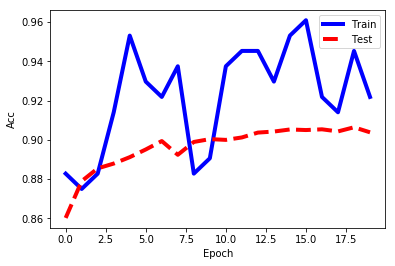

Optimization Finished!
Session closed.
Epoch: 000/020 cost: 2.048485495
Train - LR : 0.000100 / Epoch : 20 / Batch : 256 / Acc : 0.863
[[108  13]
 [ 22 113]]
[[19047  2097]
 [ 4048 16368]]
[[19005  2002]
 [ 4171 16383]]
[[18910  1987]
 [ 4250 16414]]
[[19060  2007]
 [ 4143 16351]]
[[18951  2056]
 [ 4199 16355]]
[[19052  2026]
 [ 4196 16287]]
[[18827  1990]
 [ 4248 16496]]
[[18807  2007]
 [ 4234 16513]]
[[19043  1934]
 [ 4123 16461]]
[[18924  2018]
 [ 4233 16386]]
[[18959  2044]
 [ 4148 16409]]
[[18777  2024]
 [ 4289 16471]]
[[18960  2049]
 [ 4129 16423]]
[[18957  1983]
 [ 4171 16450]]
[[19039  2014]
 [ 4046 16462]]
[[19116  2020]
 [ 4152 16273]]
[[18870  1941]
 [ 4163 16587]]
[[19154  1942]
 [ 3970 16495]]
[[19254  2006]
 [ 4115 16186]]
[[18823  2013]
 [ 4129 16596]]
Test - LR : 0.000100 / Epoch : 20 / Batch : 256 / Acc : 0.852
Epoch: 001/020 cost: 2.034582601
Train - LR : 0.000100 / Epoch : 20 / Batch : 256 / Acc : 0.875
[[121  16]
 [ 16 103]]
[[18616  2528]
 [ 2713 17703]]
[[18530  2

[[18211  2796]
 [ 1509 19045]]
[[18127  2770]
 [ 1580 19084]]
[[18216  2851]
 [ 1447 19047]]
[[18210  2797]
 [ 1530 19024]]
[[18308  2770]
 [ 1544 18939]]
[[18020  2797]
 [ 1576 19168]]
[[18011  2803]
 [ 1563 19184]]
[[18295  2682]
 [ 1449 19135]]
[[18203  2739]
 [ 1508 19111]]
[[18166  2837]
 [ 1488 19069]]
[[18005  2796]
 [ 1528 19232]]
[[18240  2769]
 [ 1485 19067]]
[[18160  2780]
 [ 1514 19107]]
[[18319  2734]
 [ 1506 19002]]
[[18374  2762]
 [ 1541 18884]]
[[18044  2767]
 [ 1433 19317]]
[[18369  2727]
 [ 1502 18963]]
[[18466  2794]
 [ 1499 18802]]
[[18037  2799]
 [ 1528 19197]]
Test - LR : 0.000100 / Epoch : 20 / Batch : 256 / Acc : 0.897
Epoch: 011/020 cost: 2.007474152
Train - LR : 0.000100 / Epoch : 20 / Batch : 256 / Acc : 0.871
[[106  16]
 [ 17 117]]
[[18999  2145]
 [ 1995 18421]]
[[18912  2095]
 [ 2036 18518]]
[[18798  2099]
 [ 2105 18559]]
[[18944  2123]
 [ 2010 18484]]
[[18890  2117]
 [ 2083 18471]]
[[19028  2050]
 [ 2056 18427]]
[[18744  2073]
 [ 2101 18643]]
[[18750  2064

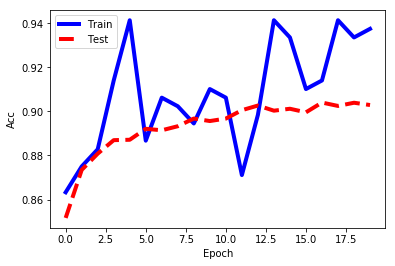

Optimization Finished!
Session closed.
Epoch: 000/020 cost: 2.042411283
Train - LR : 0.000010 / Epoch : 20 / Batch : 128 / Acc : 0.812
[[57 17]
 [ 7 47]]
[[16780  4364]
 [ 3822 16594]]
[[16749  4258]
 [ 3978 16576]]
[[16585  4312]
 [ 4052 16612]]
[[16779  4288]
 [ 3884 16610]]
[[16780  4227]
 [ 3981 16573]]
[[16855  4223]
 [ 3996 16487]]
[[16585  4232]
 [ 4021 16723]]
[[16605  4209]
 [ 4076 16671]]
[[16829  4148]
 [ 3941 16643]]
[[16732  4210]
 [ 4014 16605]]
[[16699  4304]
 [ 3932 16625]]
[[16568  4233]
 [ 4064 16696]]
[[16849  4160]
 [ 3910 16642]]
[[16708  4232]
 [ 3943 16678]]
[[16848  4205]
 [ 3898 16610]]
[[16843  4293]
 [ 3944 16481]]
[[16602  4209]
 [ 4004 16746]]
[[16881  4215]
 [ 3917 16548]]
[[16978  4282]
 [ 3945 16356]]
[[16632  4204]
 [ 4008 16717]]
Test - LR : 0.000010 / Epoch : 20 / Batch : 128 / Acc : 0.803
Epoch: 001/020 cost: 2.056933651
Train - LR : 0.000010 / Epoch : 20 / Batch : 128 / Acc : 0.812
[[56 11]
 [13 48]]
[[17801  3343]
 [ 3826 16590]]
[[17810  3197]
 [ 

[[18144  2923]
 [ 2355 18139]]
[[18113  2894]
 [ 2448 18106]]
[[18180  2898]
 [ 2430 18053]]
[[17881  2936]
 [ 2423 18321]]
[[17915  2899]
 [ 2462 18285]]
[[18111  2866]
 [ 2380 18204]]
[[18032  2910]
 [ 2369 18250]]
[[18009  2994]
 [ 2431 18126]]
[[17840  2961]
 [ 2425 18335]]
[[18069  2940]
 [ 2398 18154]]
[[18022  2918]
 [ 2412 18209]]
[[18205  2848]
 [ 2379 18129]]
[[18196  2940]
 [ 2398 18027]]
[[17899  2912]
 [ 2390 18360]]
[[18180  2916]
 [ 2407 18058]]
[[18351  2909]
 [ 2456 17845]]
[[17958  2878]
 [ 2485 18240]]
Test - LR : 0.000010 / Epoch : 20 / Batch : 128 / Acc : 0.872
Epoch: 011/020 cost: 2.028545992
Train - LR : 0.000010 / Epoch : 20 / Batch : 128 / Acc : 0.906
[[60  8]
 [ 4 56]]
[[17437  3707]
 [ 1781 18635]]
[[17392  3615]
 [ 1818 18736]]
[[17159  3738]
 [ 1915 18749]]
[[17420  3647]
 [ 1808 18686]]
[[17374  3633]
 [ 1865 18689]]
[[17424  3654]
 [ 1867 18616]]
[[17226  3591]
 [ 1867 18877]]
[[17222  3592]
 [ 1841 18906]]
[[17316  3661]
 [ 1796 18788]]
[[17357  3585]
 [

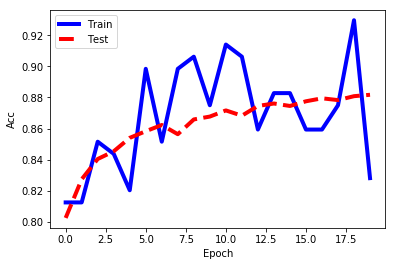

Optimization Finished!
Session closed.
Epoch: 000/020 cost: 2.038673089
Train - LR : 0.000010 / Epoch : 20 / Batch : 256 / Acc : 0.773
[[ 84  28]
 [ 30 114]]
[[16773  4371]
 [ 4629 15787]]
[[16763  4244]
 [ 4716 15838]]
[[16548  4349]
 [ 4787 15877]]
[[16640  4427]
 [ 4624 15870]]
[[16661  4346]
 [ 4640 15914]]
[[16718  4360]
 [ 4764 15719]]
[[16570  4247]
 [ 4757 15987]]
[[16557  4257]
 [ 4778 15969]]
[[16692  4285]
 [ 4747 15837]]
[[16693  4249]
 [ 4704 15915]]
[[16613  4390]
 [ 4625 15932]]
[[16433  4368]
 [ 4793 15967]]
[[16727  4282]
 [ 4668 15884]]
[[16644  4296]
 [ 4648 15973]]
[[16684  4369]
 [ 4564 15944]]
[[16753  4383]
 [ 4687 15738]]
[[16602  4209]
 [ 4779 15971]]
[[16822  4274]
 [ 4577 15888]]
[[16903  4357]
 [ 4615 15686]]
[[16589  4247]
 [ 4704 16021]]
Test - LR : 0.000010 / Epoch : 20 / Batch : 256 / Acc : 0.783
Epoch: 001/020 cost: 2.057767315
Train - LR : 0.000010 / Epoch : 20 / Batch : 256 / Acc : 0.824
[[116  26]
 [ 19  95]]
[[17422  3722]
 [ 4300 16116]]
[[17409  3

[[18163  2844]
 [ 2885 17669]]
[[17935  2962]
 [ 3032 17632]]
[[18172  2895]
 [ 2863 17631]]
[[18135  2872]
 [ 2938 17616]]
[[18182  2896]
 [ 2915 17568]]
[[17898  2919]
 [ 2953 17791]]
[[17956  2858]
 [ 3031 17716]]
[[18132  2845]
 [ 2935 17649]]
[[18018  2924]
 [ 2858 17761]]
[[18099  2904]
 [ 2868 17689]]
[[17861  2940]
 [ 2893 17867]]
[[18042  2967]
 [ 2918 17634]]
[[18062  2878]
 [ 2938 17683]]
[[18188  2865]
 [ 2773 17735]]
[[18267  2869]
 [ 2953 17472]]
[[17954  2857]
 [ 2917 17833]]
[[18185  2911]
 [ 2809 17656]]
[[18322  2938]
 [ 2869 17432]]
[[18012  2824]
 [ 2916 17809]]
Test - LR : 0.000010 / Epoch : 20 / Batch : 256 / Acc : 0.860
Epoch: 011/020 cost: 2.041521718
Train - LR : 0.000010 / Epoch : 20 / Batch : 256 / Acc : 0.859
[[113  11]
 [ 25 107]]
[[19331  1813]
 [ 4418 15998]]
[[19318  1689]
 [ 4485 16069]]
[[19125  1772]
 [ 4587 16077]]
[[19278  1789]
 [ 4380 16114]]
[[19252  1755]
 [ 4506 16048]]
[[19381  1697]
 [ 4506 15977]]
[[19105  1712]
 [ 4529 16215]]
[[19085  1729

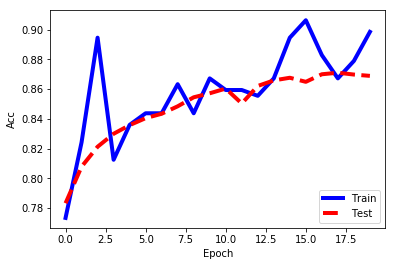

Optimization Finished!
Session closed.


In [14]:
for lrv in learning_rate:
     for te in epochs :
         for bt in batch_size :
             save_the_record = np.zeros([te, 4]) # epoch, los, trainc_acc, test_acc
             sess_run = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True))
             sess_run.run(init)
             test_matrix = np.zeros([te, 20])
             for epoch in range(te):
                 avg_cost = 0.
                 total_batch = int(n_train/bt)
                 # Loop over all batches
                 for i in range(total_batch):
                     randidx = np.random.randint(n_train, size=bt)
                     batch_xs = X_Train[randidx, :, :]
                     batch_ys = Y_Train[randidx, :]
                     # Fit training using batch data    
                     sess_run.run(training_op, feed_dict={X: batch_xs, Y: batch_ys, lr: lrv})
                     avg_cost += sess_run.run(loss, feed_dict={X: batch_xs, Y: batch_ys})/total_batch
                 save_the_record[epoch, 0], save_the_record[epoch, 1] = epoch, avg_cost
    
                 # Display logs per epoch step
                 if (epoch+1) % 1 == 0:
                     print("Epoch: %03d/%03d cost: %.9f" % (epoch, te, avg_cost))
                     train_acc = sess_run.run(accr, feed_dict={X: batch_xs, Y: batch_ys})
                     print("Train - LR : %6f / Epoch : %d / Batch : %d / Acc : %.3f" % (lrv, te, bt, train_acc))
                     train_cnfm = sess_run.run(cnfm, feed_dict={X: batch_xs, Y: batch_ys})
                     print(train_cnfm)
    
                     for i in range(20):
                         #_Test_Male_tmp = X_Test_Male[int(X_Test_Male.shape[0]/20*i):int(X_Test_Male.shape[0]/20*(i+1)), :, :]
                         #_Test_Female_tmp = X_Test_Female[int(X_Test_Female.shape[0]/20*i):int(X_Test_Female.shape[0]/20*(i+1)), :, :]
                         #_Test_tmp = np.concatenate((X_Test_Male_tmp, X_Test_Female_tmp), axis = 2)
            
                         #_Test_Male_tmp = Y_Test_Male[int(Y_Test_Male.shape[0]/20*i):int(Y_Test_Male.shape[0]/20*(i+1)), :]
                         #_Test_Female_tmp = Y_Test_Female[int(Y_Test_Female.shape[0]/20*i):int(Y_Test_Female.shape[0]/20*(i+1)), :]
                         #_Test_tmp = np.concatenate([Y_Test_Male_tmp, Y_Test_Female_tmp], axis = 0)
                
                         X_Test_tmp = X_Test[int(X_Test.shape[0]/20*i):int(X_Test.shape[0]/20*(i+1)), :, :]
                         Y_Test_tmp = Y_Test[int(Y_Test.shape[0]/20*i):int(Y_Test.shape[0]/20*(i+1)), :]
                
                         test_acc = sess_run.run(accr, feed_dict={X: X_Test_tmp, Y: Y_Test_tmp})
                         test_matrix[epoch, i] = test_acc
                         #print(\"Test accuracy - %d : %.3f\" % (i, test_acc))\n",
                         test_con = sess_run.run(cnfm, feed_dict={X: X_Test_tmp, Y: Y_Test_tmp})
                         #print(\"confusion matrix - %d\" % (i))\n",
                         print(test_con)
                     #print("Test accuracy - %d : %.3f" % (epoch, np.mean(test_matrix[epoch, :])))
                     print("Test - LR : %6f / Epoch : %d / Batch : %d / Acc : %.3f" % (lrv, te, bt, np.mean(test_matrix[epoch, :])))
                     save_the_record[epoch, 2], save_the_record[epoch, 3] = train_acc, np.mean(test_matrix[epoch, :])
                
             np.savetxt("Record_LR_%6f_E_%d_Batch_%d" % (lrv, te, bt), save_the_record, delimiter=',')
             plt.figure()
             plt.plot(save_the_record[:, 0], save_the_record[:, 2], linestyle='-', linewidth = 4, color = "blue", label = 'Train')
             plt.plot(save_the_record[:, 0], save_the_record[:, 3], linestyle='--', linewidth = 4, color = "red", label = 'Test')
             plt.xlabel('Epoch')
             plt.ylabel('Acc')
             plt.legend()
             plt.show()
             plt.savefig("Plot_LR_%6f_E_%d_Batch_%d.png" % (lrv, te, bt))
             plt.close()
        
             print("Optimization Finished!")
             sess_run.close()
             print("Session closed.")
        